# Boston Housing | Exploratory Data Analysis

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: median value of owner-occupied homes in $1000s.







In [63]:
# Important Libraries: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

# code to disable warnings:
import warnings
warnings.filterwarnings('ignore')

#### Fetching Data:

In [40]:
data = pd.read_csv('/home/omkar/Omkar Pawar/Data Science/Exploratory Data Analysis/Assets/Raw Data Sets/Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [41]:
# we can drop unnamed:0 column:
data.drop('Unnamed: 0', axis = 1, inplace=True) # axis 1 means column


#### Capitalization of Column names: (Not Necessary)

In [42]:
new_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

old_names = list(data.columns)
old_names

name_dict = {k:v for k, v in zip(old_names, new_names)}


# changing names of the columns:
data.rename(columns=name_dict, inplace=True)
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

#### Basic Overview of Data Set: 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [44]:
data.isnull().sum() # gives number of null values per feature

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

We don't have any null values.

Our Data is Ready for further analysis.


In [45]:
np.shape(data) # WE can know about dimensions of our data. (row , column)

(506, 14)

In [46]:
data.describe() # Gives statistical summary of our data.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Finding and Removing Outliers:

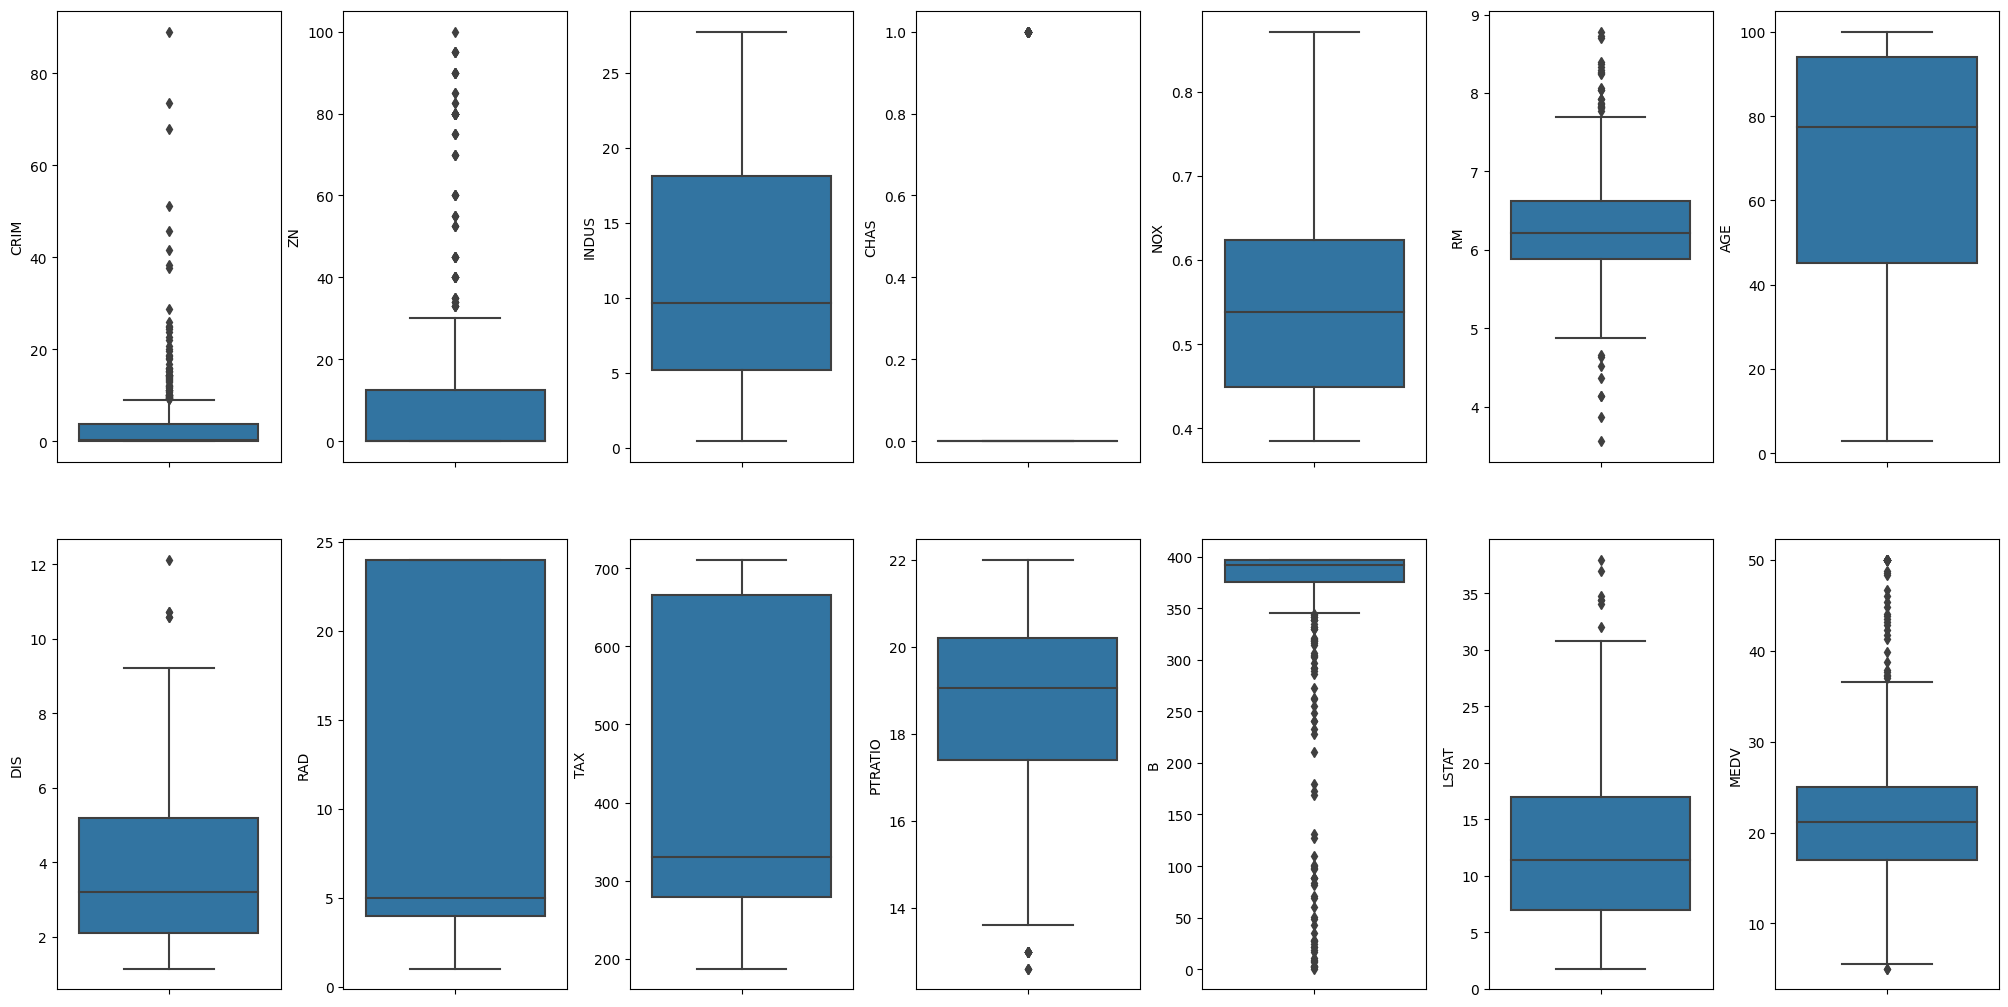

In [47]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [48]:
for k, v in data.items():
    # k - Feature , v - values from that feature
    
    q1 = v.quantile(0.25) 
    q3 = v.quantile(0.75)
    irq = q3 - q1 # Inter Quartile Range

    #  | - OR 
    # we are creating list of elements for particular features
    
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    
    
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


#### Removing outliers from Target Variable: 

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [53]:
backup_data = data # creating a backup incase we mess up with our data :)

In [54]:
np.shape(backup_data)

(506, 14)

In [55]:
# medv is target variable that is why we can't have any outliers in that feature. (not always necessary remove outliers)
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


We have dropped outliers from medv column

#### Creating data distribution plot:

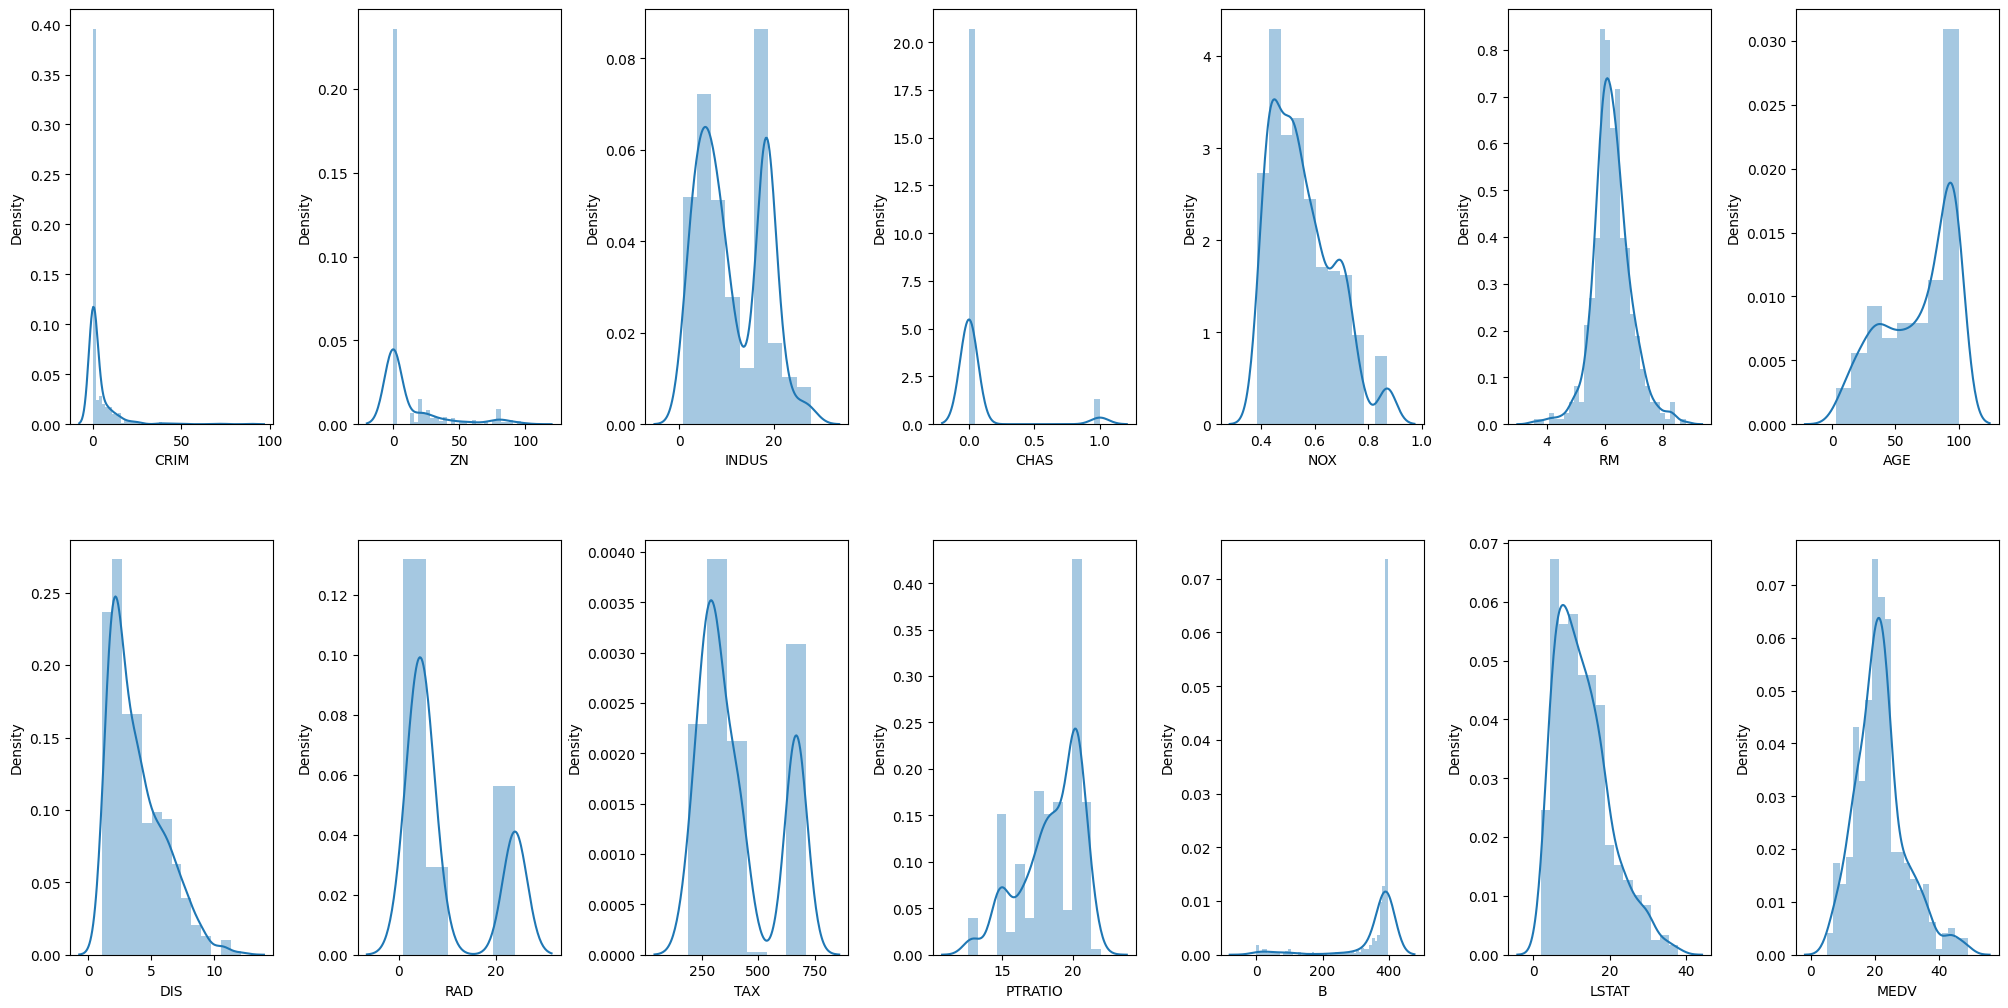

In [56]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Info: 

A positive skewness value indicates a right-skewed distribution, while a negative skewness value indicates a left-skewed distribution.

In [64]:
# We can find Skewness and Kurtosis for each variable:

from scipy.stats import skew, kurtosis

# Calculate the skewness and kurtosis for each feature
for col in data.columns:
    if col != 'MEDV':  # Skip the target variable
        skewness = skew(data[col])
        kurt = kurtosis(data[col])
        print(f'{col}: Skewness = {skewness:.2f}, Kurtosis = {kurt:.2f}')

CRIM: Skewness = 5.15, Kurtosis = 35.76
ZN: Skewness = 2.23, Kurtosis = 4.10
INDUS: Skewness = 0.32, Kurtosis = -1.20
CHAS: Skewness = 3.74, Kurtosis = 11.96
NOX: Skewness = 0.75, Kurtosis = -0.07
RM: Skewness = 0.17, Kurtosis = 2.03
AGE: Skewness = -0.59, Kurtosis = -0.98
DIS: Skewness = 1.00, Kurtosis = 0.45
RAD: Skewness = 1.01, Kurtosis = -0.85
TAX: Skewness = 0.68, Kurtosis = -1.13
PTRATIO: Skewness = -0.82, Kurtosis = -0.19
B: Skewness = -2.82, Kurtosis = 6.78
LSTAT: Skewness = 0.90, Kurtosis = 0.48


We can notice some skewness in our data: 

Right Skewed : CRIM, ZN

Left Skewed : AGE

----

#### Correlation using Heat Map: 

<Axes: >

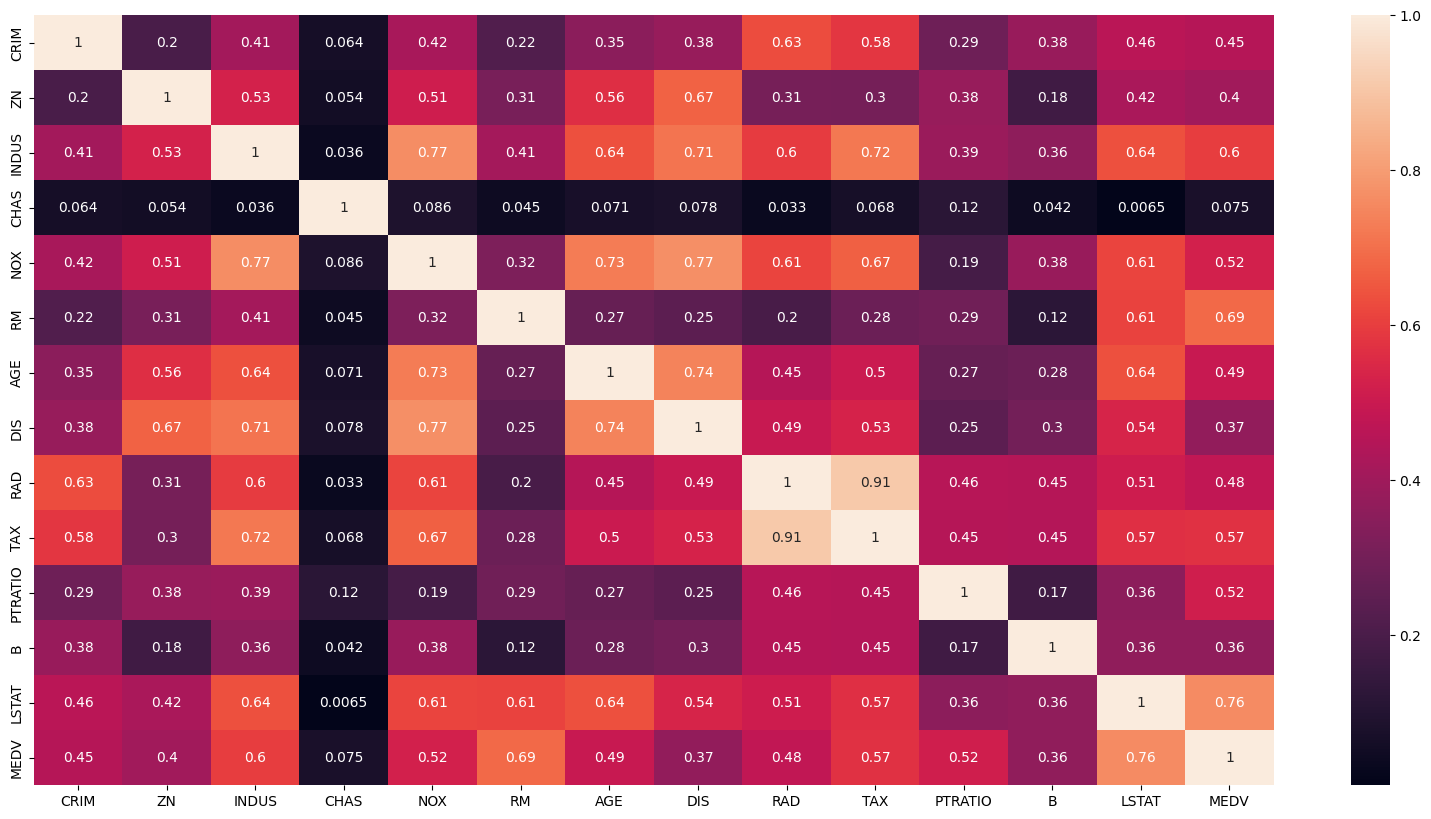

In [57]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

* `tax` and `rad` are highly correlated.
* `indus`, `nox`, `rm`, `ptration` and `lsat` have correlation above `0.5` with target variable `medv`.

----

#### Scatter plot graph against Target variable:

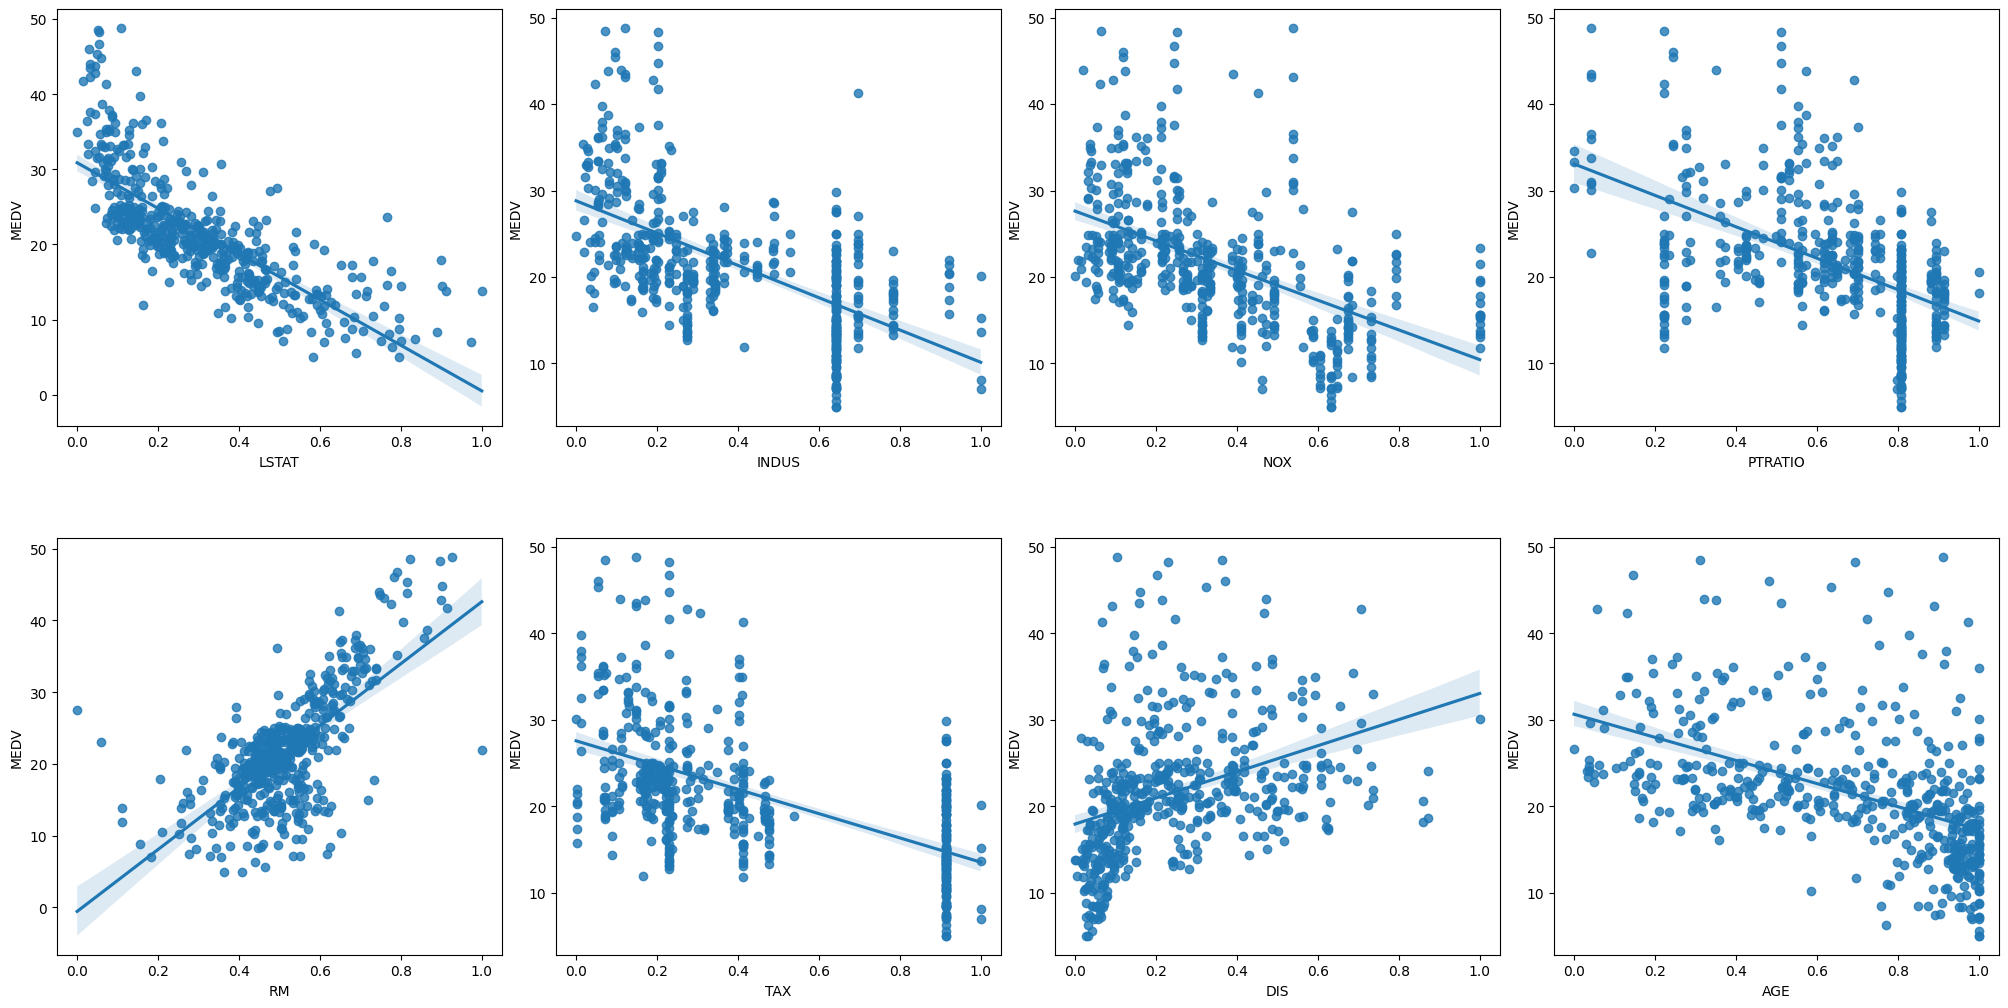

In [62]:
from sklearn import preprocessing

# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler() 
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

# We are using loc because we want to use column names instead of default indexing which is number based.
x = data.loc[:,column_sels]

y = data['MEDV']

# Creating new data frame to plot graphs against target variable `medv`
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

---

#### QnA:

Q. What is the distribution of values for each feature in the dataset?

1. After looking at Distribution and `RM: Skewness = 0.17, Kurtosis = 2.03` We can say that `RM` is Normally Distributed.
2. Right Skewed features are: `CRIM`, `ZN`, `CHAS`, `DIS`, `RAD`, 
3. Left Skewed features are: `AGE`, `B`, `PTRATIO`, 

Insights:
* Most of the Home owners are Elder Peoples with age above 40.
* There is not much Crime rate in Boston. 
* Most of the houses are not near rivers. 

Q. Do We have to pay more to get house near Charles river?

In [67]:
import pandas as pd
from scipy import stats

# Create two groups: houses near river and houses not near river
river_prices = data.loc[data['CHAS'] == 1]['MEDV'] # data.loc[data['CHAS'] == 1] we are using this part as labeled index.
not_river_prices = data.loc[data['CHAS'] == 0]['MEDV']

# Perform a two-sample t-test assuming unequal variances
t_statistic, p_value = stats.ttest_ind(river_prices, not_river_prices, equal_var=False)
print('t_statistic: ', t_statistic)
print('p_value: ', p_value)
# Check if p-value is less than 0.05 (assuming a significance level of 0.05)
if p_value < 0.05:
    print('There is a significant difference between house prices near and not near the river.')
else:
    print('There is no significant difference between house prices near and not near the river.')


t_statistic:  1.8379064458206327
p_value:  0.07519889252702865
There is no significant difference between house prices near and not near the river.



Are there any missing values in the dataset, and if so, how are they distributed across the features?

Are there any outliers or extreme values in the dataset, and how do they affect our understanding of the data?

What is the correlation between each feature and the target variable (MEDV), and which features are most strongly correlated?

Are there any significant differences in the distribution of features between neighborhoods in Boston?

How do different combinations of features affect the distribution of MEDV values in the dataset?

Are there any patterns or trends in the relationship between features and MEDV that can be observed through visualizations?

Are there any interactions or nonlinear relationships between features that affect the target variable?

How do different statistical transformations of the features (such as logarithmic or polynomial transformations) affect the relationship with MEDV?

How well can different regression models predict the target variable based on the available features, and what are the most important predictors for these models?

-----------------------------------------------------------------------
What is the distribution of MEDV values in the dataset?

Which features are most strongly correlated with MEDV?

Is there a relationship between the proportion of non-retail business acres per town (INDUS) and housing prices (MEDV)?

How does the crime rate (CRIM) affect housing prices (MEDV)?

Is there a significant difference in housing prices (MEDV) between neighborhoods with different levels of air pollution (NOX)?

How do the distances to employment centers (DIS) and radial highways (RAD) affect housing prices (MEDV)?

Is there a relationship between the percentage of lower status of the population (LSTAT) and housing prices (MEDV)?

How does the pupil-teacher ratio (PTRATIO) affect housing prices (MEDV)?

Are there any significant differences in housing prices (MEDV) between neighborhoods that border the Charles River (CHAS) and those that do not?

Can we build an accurate regression model to predict housing prices (MEDV) based on the other input features in the dataset?